In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('tumor_classification_dataset.csv')
data

,x1,x2,y
0,0.127071,1.013042,1
1,2.312935,3.770534,1
2,3.340428,3.420996,1
3,3.294548,0.595620,1
4,1.944105,1.477241,1
...,...,...,...
195,-3.325239,0.080488,0
196,-1.741314,2.970952,0
197,-1.581615,2.196672,0
198,1.871664,2.690409,1


In [3]:
x=data.drop(columns=['y'])
x

,x1,x2
0,0.127071,1.013042
1,2.312935,3.770534
2,3.340428,3.420996
3,3.294548,0.595620
4,1.944105,1.477241
...,...,...
195,-3.325239,0.080488
196,-1.741314,2.970952
197,-1.581615,2.196672
198,1.871664,2.690409


In [4]:
x.shape


(200, 2)

In [5]:
y=data['y'].values
y

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0], dtype=int64)

In [6]:
y.shape

(200,)

In [7]:
x=x.values

In [8]:
x

array([[ 1.27071018e-01,  1.01304200e+00],
       [ 2.31293463e+00,  3.77053357e+00],
       [ 3.34042818e+00,  3.42099601e+00],
       [ 3.29454774e+00,  5.95619812e-01],
       [ 1.94410516e+00,  1.47724090e+00],
       [-1.11959689e+00,  1.50891314e+00],
       [ 1.15108470e+00,  1.81007677e+00],
       [-1.00745441e+00,  5.47157435e-01],
       [-2.25396925e+00,  1.06769236e+00],
       [-1.24392415e+00,  2.19979806e+00],
       [-2.92089280e+00,  3.91894990e+00],
       [-5.11937308e-01,  4.50578584e+00],
       [ 3.25751204e+00,  2.81515089e+00],
       [-4.12190908e+00,  1.62220145e+00],
       [ 2.87768113e+00,  1.51095984e+00],
       [-5.32144582e-01,  1.78719280e+00],
       [ 1.48404809e+00,  1.04843842e+00],
       [-1.54235518e+00,  4.49536942e+00],
       [ 2.04235818e+00,  2.10204918e+00],
       [ 2.63367133e+00,  1.59219328e+00],
       [ 2.85756778e+00,  2.73826470e+00],
       [-3.41167954e+00,  1.93790864e-01],
       [ 1.87481918e+00,  1.48815664e+00],
       [-9.

In [9]:
x_train=x[0:int(0.8*x.shape[0]),:]
y_train=y[0:int(0.8*x.shape[0])]

In [10]:
x_train

array([[ 1.27071018e-01,  1.01304200e+00],
       [ 2.31293463e+00,  3.77053357e+00],
       [ 3.34042818e+00,  3.42099601e+00],
       [ 3.29454774e+00,  5.95619812e-01],
       [ 1.94410516e+00,  1.47724090e+00],
       [-1.11959689e+00,  1.50891314e+00],
       [ 1.15108470e+00,  1.81007677e+00],
       [-1.00745441e+00,  5.47157435e-01],
       [-2.25396925e+00,  1.06769236e+00],
       [-1.24392415e+00,  2.19979806e+00],
       [-2.92089280e+00,  3.91894990e+00],
       [-5.11937308e-01,  4.50578584e+00],
       [ 3.25751204e+00,  2.81515089e+00],
       [-4.12190908e+00,  1.62220145e+00],
       [ 2.87768113e+00,  1.51095984e+00],
       [-5.32144582e-01,  1.78719280e+00],
       [ 1.48404809e+00,  1.04843842e+00],
       [-1.54235518e+00,  4.49536942e+00],
       [ 2.04235818e+00,  2.10204918e+00],
       [ 2.63367133e+00,  1.59219328e+00],
       [ 2.85756778e+00,  2.73826470e+00],
       [-3.41167954e+00,  1.93790864e-01],
       [ 1.87481918e+00,  1.48815664e+00],
       [-9.

In [11]:
x_train.shape

(160, 2)

In [12]:
y_train

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0], dtype=int64)

In [13]:
y_train.shape

(160,)

In [14]:
x_test=x[int(0.8*x.shape[0]):,:]
y_test=y[int(0.8*x.shape[0]):]

In [15]:
x_test

array([[-3.44168668,  2.84346099],
       [-0.76109699,  1.69843315],
       [-1.71809799,  2.2847179 ],
       [ 1.97059618,  1.57621593],
       [ 1.31440771,  2.12561328],
       [ 3.74022947,  1.52376227],
       [-2.26435183,  1.76465751],
       [ 1.65696708,  2.15419481],
       [ 2.95795585,  2.62812515],
       [ 2.37489728,  2.9532637 ],
       [-1.30809618,  2.95043884],
       [ 3.30799727,  2.16341341],
       [ 1.81404363,  0.64151964],
       [-0.30697698,  3.41232056],
       [-1.59666542,  0.90877486],
       [ 2.65912112,  0.88253992],
       [-0.21428968,  2.87839005],
       [ 1.63325054,  2.06751302],
       [ 1.67392583,  3.48277463],
       [ 1.32688158,  2.04961997],
       [ 2.46965534,  1.71961349],
       [ 1.37226849,  2.33797626],
       [-3.56426542,  3.55034764],
       [ 1.52805555,  1.53838702],
       [ 2.95082039,  1.61542493],
       [ 2.16573571,  2.50649925],
       [-1.47553789,  0.71148051],
       [-0.92974949,  2.72051478],
       [-1.91252221,

In [16]:
x_test.shape

(40, 2)

In [17]:
y_test

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [18]:
y_test.shape

(40,)

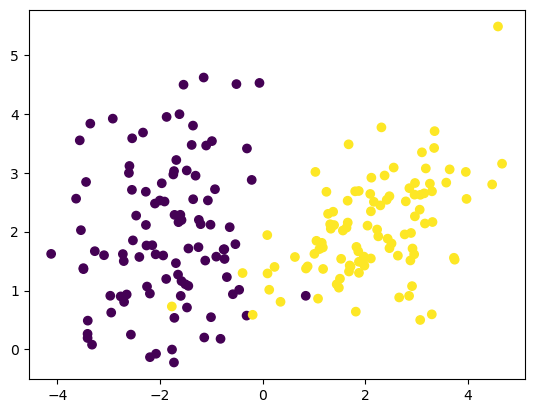

In [19]:
plt.scatter(x[:,0],x[:,1],c=y)

In [36]:
n=x_train.shape[1]
w=np.random.randn(n)
b=0

In [37]:
def pred(x,w,b):   
    return 1/(1+np.exp(-(np.dot(x,w)+b)))


In [38]:
def cost_ftn(y_hat,y):
    m=y_hat.shape[0]
    return np.sum(-y*np.log(y_hat)-(1-y)*(np.log(1-y_hat)))/m

In [39]:
def gradient(x,y,w,b):
    lr=0.01
    epochs=1000
    m=y.shape[0]
    cost=[]
    it=[]
    for i in range (epochs):
        y_hat=pred(x,w,b)
        dw=np.dot(x.T,y_hat-y)/m
        db=np.mean(y_hat-y)
        w-=lr*dw
        b-=lr*db
        cost.append(cost_ftn(y_hat,y))
        it.append(i)
    return w,b,cost,it

In [40]:
ww,bb,cost,it=gradient(x_train,y_train,w,b)

In [41]:
cost[-1]

0.12262882695077033

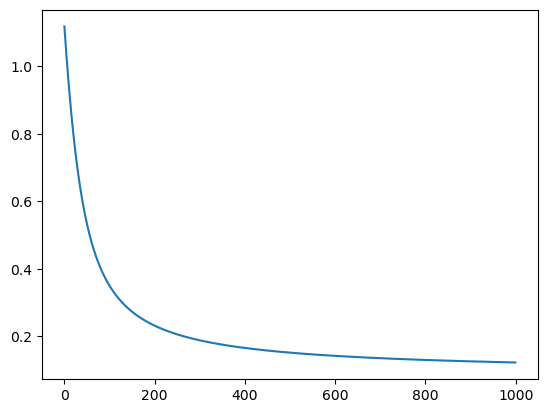

In [42]:
plt.plot(it,cost)

In [43]:
preds=pred(x_test,ww,bb)
preds=np.where(preds>=0.5,1,0)
np.mean(preds==y_test) * 100

100.0

In [44]:
print('predictions',preds)
print('actual',y_test)

predictions [0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0
 0 1 0]
actual [0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0
 0 1 0]


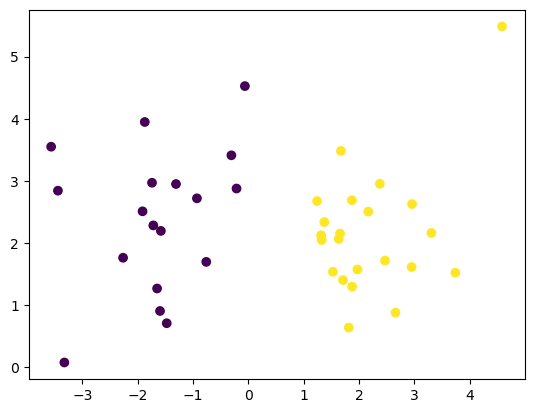

In [45]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)

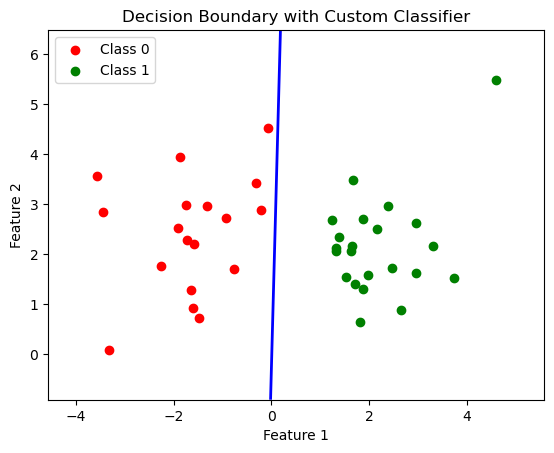

In [53]:
# Define step size for mesh grid
step_size = 0.01

# Create mesh grid based on feature ranges
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=step_size),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=step_size)
)

# Get the predictions for each point in the mesh grid
Z = pred(np.c_[X1.ravel(), X2.ravel()], ww, bb)
Z = Z.reshape(X1.shape)

# Update contour plot to show only a single decision boundary
plt.contour(X1, X2, Z, levels=[0.5], colors='blue', linewidths=2)

# Plotting test points with actual labels
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                color=ListedColormap(('red', 'green'))(i), label=f'Class {j}')

plt.title('Decision Boundary with Custom Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [54]:
data1=pd.read_csv('Social_Network_Ads.csv')
data1

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [55]:
data1.shape

(400, 3)

In [56]:
x1=data1.drop(columns=['Purchased']).values

In [57]:
x1

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [58]:
y1=data1['Purchased'].values

In [59]:
y1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [60]:
xx_train=x1[0:int(0.8*x1.shape[0]),:]
yy_train=y1[0:int(0.8*x1.shape[0])]

In [61]:
xx_train

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [62]:
xx_train.shape

(320, 2)

In [63]:
yy_train.shape

(320,)

In [64]:
xx_test=x1[int(0.8*x1.shape[0]):,:]
yy_test=y1[int(0.8*x1.shape[0]):]

In [65]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(xx_train)

X_test_scaled = scaler.transform(xx_test)

In [66]:
def prediction(x,w,b):
    z=np.dot(x,w)+b
    return 1/(1+np.exp(-z))


In [67]:
def cost_function(y_hat,y):
    m=y_hat.shape[0]
    return np.mean(-y*np.log(y_hat)-((1-y)*(np.log(1-y_hat))))

In [68]:
def gradient_descent(x,y,w,b):
    lr=0.1
    epochs=150
    m=y.shape
    cost=[]
    it=[]
    for i in range (epochs):
        y_hat=prediction(x,w,b)
        dw=np.dot(x.T,y_hat-y)/m
        db=np.mean(y_hat-y)
        w-=lr*dw
        b-=lr*db
        cost.append(cost_function(y_hat,y))
        it.append(i)
    return w,b,cost,it

In [69]:
n=X_train_scaled.shape[1]
w_=np.random.randn(n)
b_=0

In [70]:
y_hat=prediction(X_train_scaled,w,b)

In [71]:
yy_train.shape

(320,)

In [72]:
w,b,cost,it=gradient_descent(X_train_scaled,yy_train,w_,b_)

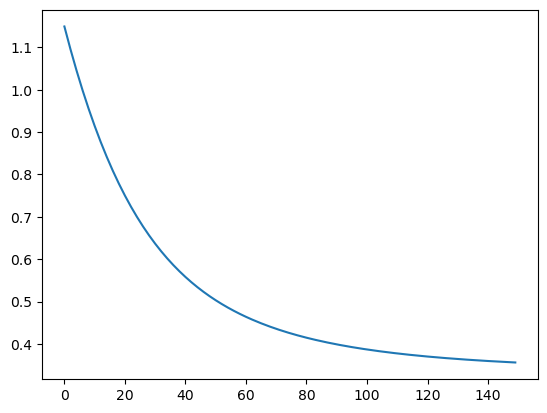

In [73]:
plt.plot(it,cost)

In [74]:
predicted=prediction(X_test_scaled,w_,b_)
predicted=np.where(predicted>=0.5,1,0)
np.mean(predicted==yy_test) * 100

70.0